<a href="https://colab.research.google.com/github/numoworld/learnpytorchio/blob/main/04aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
!ls data/pizza_steak_sushi/train/pizza

1008844.jpg  1654444.jpg  2291093.jpg  2785084.jpg  320570.jpg	 5764.jpg
1033251.jpg  1660415.jpg  2330965.jpg  2800325.jpg  3269634.jpg  618348.jpg
1044789.jpg  1899785.jpg  2382016.jpg  2811032.jpg  3281494.jpg  667309.jpg
1089334.jpg  1947572.jpg  2426686.jpg  2821048.jpg  3338774.jpg  68684.jpg
1105700.jpg  1968947.jpg  2428085.jpg  2885050.jpg  3441394.jpg  702165.jpg
12301.jpg    2026009.jpg  244505.jpg   2885796.jpg  3505182.jpg  715169.jpg
1285298.jpg  2121603.jpg  2451169.jpg  2924941.jpg  3530210.jpg  739735.jpg
138855.jpg   2154394.jpg  2493954.jpg  29417.jpg    3589437.jpg  741883.jpg
1412034.jpg  218711.jpg   2569760.jpg  2992084.jpg  3699992.jpg  764429.jpg
1524655.jpg  2190018.jpg  2576168.jpg  300869.jpg   3821701.jpg  765799.jpg
1572608.jpg  220190.jpg   2687575.jpg  3018077.jpg  38349.jpg	 786995.jpg
1633289.jpg  2228322.jpg  2702825.jpg  3109486.jpg  3860002.jpg  853441.jpg
1649276.jpg  2285942.jpg  2760984.jpg  3196721.jpg  393658.jpg	 928670.jpg


In [4]:
import os

for dirpath, dirs, filenames in os.walk(image_path):
    print(f'Path: {dirpath} | Directories: {len(dirs)} | Files: {len(filenames)}')

Path: data/pizza_steak_sushi | Directories: 2 | Files: 0
Path: data/pizza_steak_sushi/train | Directories: 3 | Files: 0
Path: data/pizza_steak_sushi/train/steak | Directories: 0 | Files: 75
Path: data/pizza_steak_sushi/train/pizza | Directories: 0 | Files: 78
Path: data/pizza_steak_sushi/train/sushi | Directories: 0 | Files: 72
Path: data/pizza_steak_sushi/test | Directories: 3 | Files: 0
Path: data/pizza_steak_sushi/test/steak | Directories: 0 | Files: 19
Path: data/pizza_steak_sushi/test/pizza | Directories: 0 | Files: 25
Path: data/pizza_steak_sushi/test/sushi | Directories: 0 | Files: 31


In [5]:
train_path = image_path / 'train'
test_path = image_path / 'test'

train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Print random image

Image path: data/pizza_steak_sushi/train/pizza/715169.jpg
Image class: pizza
Image height: 512
Image width: 512


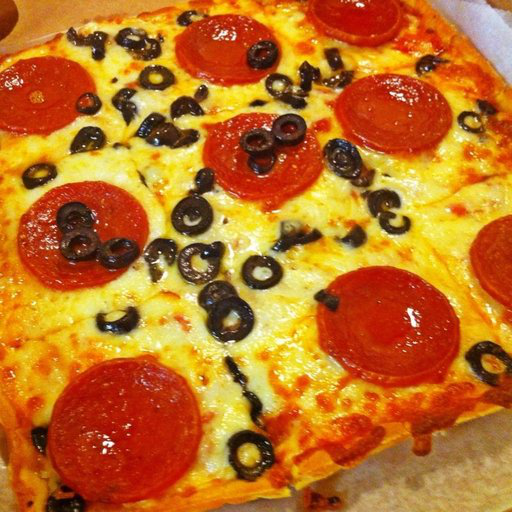

In [6]:
from PIL import Image

import random

# get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# select random image path
random_image_path = random.choice(image_path_list)

# get class name
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f'Image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

Print image with matplotlib

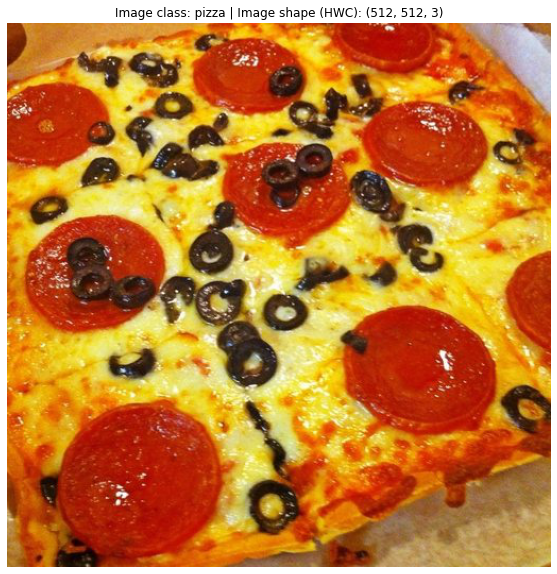

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(10,10))
plt.axis(False)
plt.title(f'Image class: {image_class} | Image shape (HWC): {img_as_array.shape}')
plt.imshow(img)

##Transform data

1. Import libraries

In [8]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

2. Build transforming pipeline

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)), 
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.ToTensor()
])

Plot random images before and after transforming

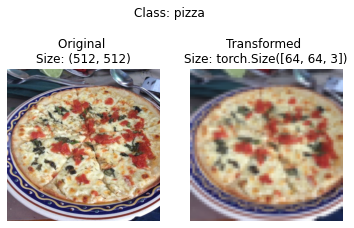

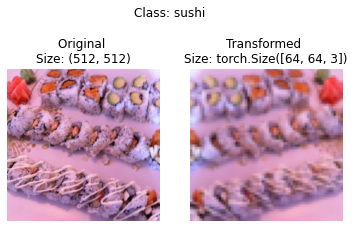

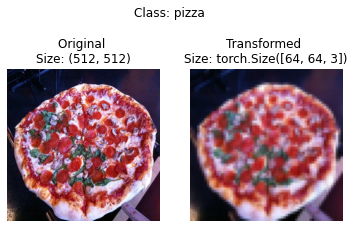

In [10]:
def plot_transformed_images(image_path_list, transform, n=3, seed=721):
    """Plots random images before and after transformation

    Opens n images from image_path_list, transforms them with
    transform and plots original and transformed images.
    
    Args:
        image_path_list: list of paths of images to plot
        transform: transforms to apply to the images
        n: number of images to transform
        seed: seed for random generator
    """
    random.seed(721)

    random_image_paths = random.sample(image_path_list, k=n)

    for img_path in random_image_paths:
        with Image.open(img_path) as img:
            fig, ax = plt.subplots(1, 2)
            fig.suptitle(f'Class: {img_path.parent.stem}')

            ax[0].imshow(img)
            ax[0].set_title(f'Original \nSize: {img.size}')
            ax[0].axis('off')
            
            # Pytorch image dimensions are CHW, but matplotlib's are HWC
            t_img = transform(img).permute(1, 2, 0)
            ax[1].imshow(t_img)
            ax[1].set_title(f'Transformed \nSize: {t_img.shape}')
            ax[1].axis('off')

plot_transformed_images(
    image_path_list,
    transform=data_transform,
    n=3
)

## Create Dataset

In [11]:
train_data = datasets.ImageFolder(
    root=train_path,
    transform=data_transform
)
test_data = datasets.ImageFolder(
    root=test_path,
    transform=data_transform
)

print(f'Train dataset: {train_data}\n\nTest dataset: {test_data}')

Train dataset: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

Test dataset: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
train_data.classes

['pizza', 'steak', 'sushi']

In [13]:
train_data.class_to_idx.values()

dict_values([0, 1, 2])

Plot single image from dataset

Text(0.5, 1.0, 'Class: pizza | Shape: (64, 64, 3)')

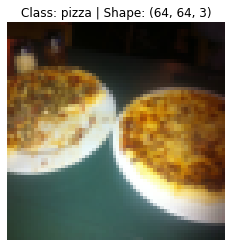

In [14]:
img, label = train_data[0]
permuted_img = img.permute(1, 2, 0)

plt.imshow(permuted_img)
plt.axis(False)
plt.title(f'Class: {train_data.classes[label]} | Shape: {tuple(permuted_img.shape)}')

## Create data loaders

In [15]:
import os


BATCH_SIZE = 32

NUM_WORKERS = os.cpu_count()

train_dl = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)
test_dl = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

## Create model (TinyVGG)

In [16]:
import torch.nn as nn

class TinyVGG0(nn.Module):
    def __init__(self, in_channels, out_features, hidden_units=10):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=in_channels,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*16*16,
                out_features=out_features)
        )
    def forward(self, x):
        return self.classifier(self.block2(self.block1(x)))  # operator fusion
        

torch.manual_seed(721)

model0 = TinyVGG0(in_channels=3, out_features=3)
model0

TinyVGG0(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Check model output

In [17]:
model0.eval()
x = train_data[0][0]

logits = model0(x.unsqueeze(0))
pred = torch.softmax(logits, dim=1)
label = pred.argmax(dim=1)

print(f'Logits: {logits}')
print(f'pred]: {pred}')
print(f'label: {label}')

Logits: tensor([[-0.0127,  0.0256,  0.0454]], grad_fn=<AddmmBackward0>)
pred]: tensor([[0.3227, 0.3353, 0.3420]], grad_fn=<SoftmaxBackward0>)
label: tensor([2])


In [18]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary

summary(model0, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG0                                 [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Train model


Train step function

In [37]:
def train_step(
    model,
    dl,
    loss_fn,
    optimizer,
    device
):
    model.train()

    train_acc, train_loss = 0, 0
    for X, y in dl:
        X, y = X.to(device), y.to(device)

        logits = model(X)
        pred = logits.argmax(dim=1)

        loss = loss_fn(logits, y)
        accuracy = (pred == y).sum().item() / len(y) * 100
        train_acc += accuracy
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    
    train_loss /= len(dl)
    train_acc /= len(dl)

    return train_loss, train_acc

Test step function

In [48]:
def test_step(
    model,
    dl,
    loss_fn,
    device
):
    model.eval()

    test_acc, test_loss = 0, 0
    with torch.inference_mode():
        for X, y in dl:
            X, y = X.to(device), y.to(device)

            logits = model(X)
            pred = logits.argmax(dim=1)

            loss = loss_fn(logits, y)
            accuracy = (pred == y).sum().item() / len(y) * 100
            test_acc += accuracy
            test_loss += loss.item()
    
        test_loss /= len(dl)
        test_acc /= len(dl)

    return test_loss, test_acc

Train function

In [42]:
from tqdm.auto import tqdm

def train(
    model,
    train_dl,
    test_dl,
    loss_fn,
    optimizer,
    device='cpu',
    n_epochs=3
):
    model = model

    results = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }

    for epoch in tqdm(range(1, n_epochs + 1)):
        train_loss, train_acc = train_step(
            model,
            train_dl,
            loss_fn,
            optimizer,
            device
        )

        test_loss, test_acc = test_step(
            model,
            test_dl,
            loss_fn,
            device
        )

        print(f'Epoch: {epoch}')
        print(f'Train loss: {train_loss}')
        print(f'Train accuracy: {train_acc}')
        print(f'Test loss: {test_loss}')
        print(f'Test accuracy: {test_acc}')

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results

## Evaluate model

In [62]:
from timeit import default_timer as timer

torch.manual_seed(721)
torch.cuda.manual_seed(721)


N_EPOCHS = 10

model = TinyVGG0(
    in_channels=3,
    out_features=3,
    hidden_units=10
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

start_time = timer()

results = train(
    model,
    train_dl,
    test_dl,
    loss_fn,
    optimizer,
    device,
    N_EPOCHS
)

end_time = timer()

print(f'Total training time: {end_time - start_time}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Train loss: 1.1031117737293243
Train accuracy: 25.0
Test loss: 1.1458581686019897
Test accuracy: 19.791666666666668
Epoch: 2
Train loss: 1.096287116408348
Train accuracy: 41.40625
Test loss: 1.1561836401621501
Test accuracy: 19.791666666666668
Epoch: 3
Train loss: 1.110155537724495
Train accuracy: 29.296875
Test loss: 1.1326262950897217
Test accuracy: 27.083333333333332
Epoch: 4
Train loss: 1.0957859009504318
Train accuracy: 31.25
Test loss: 1.143233060836792
Test accuracy: 19.791666666666668
Epoch: 5
Train loss: 1.0919126868247986
Train accuracy: 41.40625
Test loss: 1.1572591463724773
Test accuracy: 19.791666666666668
Epoch: 6
Train loss: 1.1149144917726517
Train accuracy: 29.296875
Test loss: 1.1097629865010579
Test accuracy: 19.791666666666668
Epoch: 7
Train loss: 1.0942519903182983
Train accuracy: 41.40625
Test loss: 1.1253162622451782
Test accuracy: 19.791666666666668
Epoch: 8
Train loss: 1.1063767820596695
Train accuracy: 29.296875
Test loss: 1.1258507172266643
Test accu

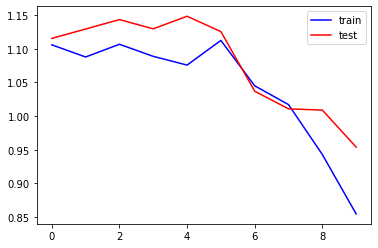

In [67]:
def plot_losses(train_loss, test_loss):
    plt.plot(train_loss, c='b', label='train')
    plt.plot(test_loss, c='r', label='test')
    plt.legend()

plot_losses(
    results['train_loss'],
    results['test_loss']
)

## Try data augmentation

In [56]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [57]:
train_data = datasets.ImageFolder(
    root=train_path,
    transform=train_transform
)
test_data = datasets.ImageFolder(
    root=test_path,
    transform=test_transform
)

In [58]:
torch.manual_seed(721)

train_dl = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dl = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

In [72]:
from timeit import default_timer as timer

torch.manual_seed(721)
torch.cuda.manual_seed(721)


N_EPOCHS = 10

model = TinyVGG0(
    in_channels=3,
    out_features=3,
    hidden_units=10
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

start_time = timer()

results = train(
    model,
    train_dl,
    test_dl,
    loss_fn,
    optimizer,
    device,
    N_EPOCHS
)

end_time = timer()

print(f'Total training time: {end_time - start_time}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
Train loss: 1.105938345193863
Train accuracy: 28.125
Test loss: 1.1154489914576213
Test accuracy: 26.041666666666668
Epoch: 2
Train loss: 1.08787040412426
Train accuracy: 40.625
Test loss: 1.1294033527374268
Test accuracy: 19.791666666666668
Epoch: 3
Train loss: 1.106752797961235
Train accuracy: 29.296875
Test loss: 1.1434114376703899
Test accuracy: 19.791666666666668
Epoch: 4
Train loss: 1.0888149440288544
Train accuracy: 41.40625
Test loss: 1.1296655337015789
Test accuracy: 19.791666666666668
Epoch: 5
Train loss: 1.0758063048124313
Train accuracy: 43.75
Test loss: 1.1484990119934082
Test accuracy: 28.125
Epoch: 6
Train loss: 1.112654983997345
Train accuracy: 36.71875
Test loss: 1.1252568165461223
Test accuracy: 34.375
Epoch: 7
Train loss: 1.0457868427038193
Train accuracy: 43.75
Test loss: 1.0356547037760417
Test accuracy: 46.30681818181818
Epoch: 8
Train loss: 1.0174548923969269
Train accuracy: 50.0
Test loss: 1.010090132554372
Test accuracy: 46.40151515151515
Epoch: 9
Trai

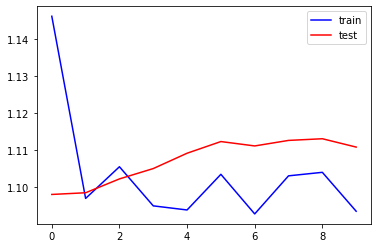

In [71]:
plot_losses(
    results['train_loss'],
    results['test_loss']
)